# Fibonacci Sequence and efficient algorithms

In class you saw the Fibonacci sequence defined as
$$
F_n = \begin{cases}
        0 & n=0\\
        1 & n=1\\
        F_{n-1} + F_{n-2} & n > 1
      \end{cases}
$$

Using the recursive definition you arrived to the algorithm ${\tt fib1}$, which we showed has an exponential complexity. Then, we formulated the more efficient iterative algorithm ${\tt fib2}$ with $O(n)$ complexity (given that additions are constant time). Now, we are going to try for an even more efficient algorithm. We can write

$$\begin{cases} F_1 & = F_1 \\ F_2 & = F_1 + F_0 \end{cases}$$

In matrix notation:

$$\begin{pmatrix} F_1 \\ F_2\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}$$

Similarly:
$$
    \begin{pmatrix} F_2 \\ F_3\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}\cdot \begin{pmatrix} F_1 \\ F_2\end{pmatrix}= \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}^2\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}
$$
and in general:
$$
    \begin{pmatrix} F_n \\ F_{n+1}\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}^n\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}.
$$

First we need a way to multiply matrices. For various technical reasons, you will implement your own $2 \times 2$ matrix multiplication.

In [ ]:
import timeit
import matplotlib.pyplot as plt
fib = [
    0,
    1,
    1,
    2,
    3,
    5,
    8,
    13,
    21,
    34,
    55,
    89,
    144,
    233,
    377,
    610,
    987,
    1597,
    2584,
    4181,
    6765,
    10946,
    17711,
    28657,
    46368,
    75025,
    121393,
    196418,
    317811,
    514229,
    832040,
    1346269,
    2178309,
    3524578,
    5702887
]

In [ ]:
def matrix_multiply(A, B):
    C = [[0, 0], [0, 0]]
    for i in range(2):
        for j in range(2):
            C[i][j] = A[i][0] * B[0][j] + A[i][1] * B[1][j]
    return C

Using your `matrix_multiply` function you can now implement the iterative algorithm by computing the correct power of the matrix.

In [ ]:
A = [[0, 1], [1, 1]]

def fib2(n: int):
    if n == 0: return 0
    if n == 1: return 1
    An = [[1, 0], [0, 1]]
    for i in range(n-1):
      An = matrix_multiply(A, An)

    return An[1][1]

Test how fast your implementation is

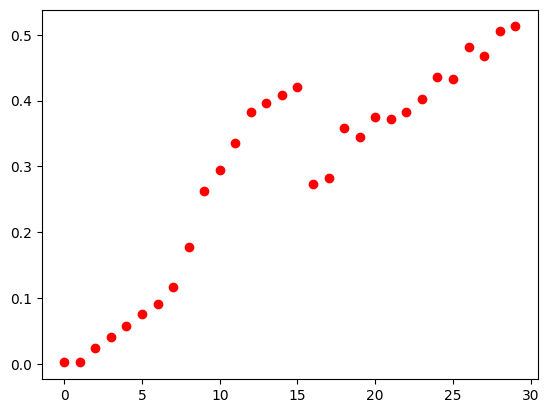

In [ ]:
N = 30
# When it's ready to submit, uncomment the next line
#N = 100
fib2_results = [fib2(i) for i in range(len(fib))]
for i in range(0, 35):
    assert fib[i] == fib2_results[i], f'fib({i}) = {fib[i]}, but you returned fib2({i}) = {fib2_results[i]}'

rtime2 = [timeit.timeit(stmt='fib2({})'.format(n), globals=globals(), number=10000) for n in range(N)]
plt.plot(range(N), rtime2, 'or')

Now it's time to speed up calculations further. Use your answer from question 2b to write `fib3`.

In [ ]:
def fib3(n: int):
    if n == 0: return 0
    if n == 1: return 1
    An = [[1, 0], [0, 1]]

    def matrix_power(X, n):
        if n == 0:
            return An
        elif n == 1:
            return X

        Y = matrix_power(X, n//2)
        if n % 2 == 0:
            return matrix_multiply(Y, Y)
        else:
            return matrix_multiply(matrix_multiply(Y, Y), X)

    A = [[0, 1], [1, 1]]

    An = matrix_power(A, n)

    #Changed to An[0][1] as the original does not give the correct value.
    return An[0][1]

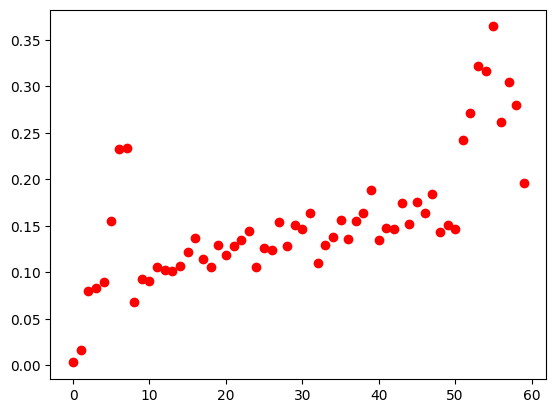

In [ ]:
N = 60
# When it's ready to submit, uncomment the next line
# N = 200
fib3_results = [fib3(i) for i in range(len(fib))]
for i in range(0, 35):
    assert fib[i] == fib3_results[i], f'fib({i}) = {fib[i]}, but you returned fib3({i}) = {fib3_results[i]}'

rtime2 = [timeit.timeit(stmt='fib3({})'.format(n), globals=globals(), number=10000) for n in range(N)]
plt.plot(range(N), rtime2, 'or')